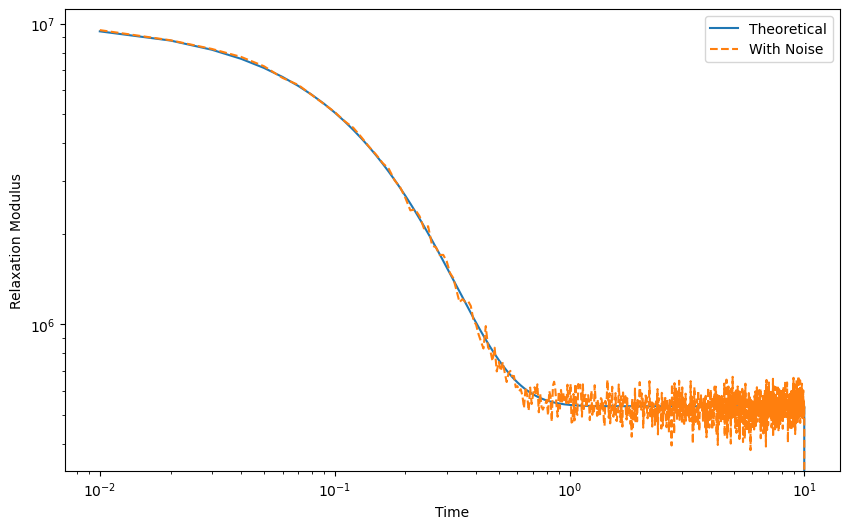

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# User-defined parameters
M = 1000  # sequence length
Delta_t = 0.01  # timestep
G_e = 1  # your value of Ge
noise_level = 5.0e4  # adjust as necessary

# Define the directory and file
dir = os.path.join(os.path.dirname(os.getcwd()), 'polyisobutylene_data')
filename = 'PIB.txt'
filepath = os.path.join(dir, filename)

# Load the CSV data
data = pd.read_csv(filepath,delimiter='\t')

# Extract G_k and tau_k arrays
G_k = data.iloc[:, 0].to_numpy()
tau_k = data.iloc[:, 1].to_numpy()

# Create the time array and the Heaviside step function
n = np.arange(1, M+1)
u_n = np.heaviside(n, 1)
u_M = np.heaviside(n-M, 1)

# Calculate the relaxation modulus with noise
y_n = (u_n - u_M) * (np.sum(G_k[:, None] * np.exp(-n[None, :] * Delta_t / tau_k[:, None]), axis=0) + G_e)

# Add Gaussian noise
np.random.seed(0)  # for reproducibility
noise = noise_level * np.random.normal(size=y_n.shape)
y_noisy = y_n + noise

# Plot the relaxation modulus with and without noise
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n * Delta_t, y_n, label='Theoretical')
ax.plot(n * Delta_t, y_noisy, label='With Noise', linestyle='dashed')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time')
ax.set_ylabel('Relaxation Modulus')
ax.legend()
plt.show()
